In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv('taylor_swift_processed.csv')
df.head(5)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Welcome To New York (Taylor's Version),1989,27/10/2023,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,79,212600
1,Blank Space (Taylor's Version),1989,27/10/2023,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,79,231833
2,Style (Taylor's Version),1989,27/10/2023,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,80,231000
3,Out Of The Woods (Taylor's Version),1989,27/10/2023,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,79,235800
4,All You Had To Do Was Stay (Taylor's Version),1989,27/10/2023,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,78,193289


In [30]:
# Get list of column names from dataset
column_names = np.array(df.columns)
print(column_names)
# Extract the columns which form the musical audio attributes (therefore from 'acousticness' to 'valence', so indices 6 to 15)
features_matrix_columns = column_names[6:15]
features_matrix_columns
# Now get the lists of values for these columns
features_matrix = df[features_matrix_columns]
# Now extract the 'target array' from the datarame, i.e. album name (the label we want to predict with K-NN)
target_array = df['album']
def normalize(col): # takes the column as input argument
    mean = col.mean() 
    std = col.std() # standard deviation
    return ((col-mean) / std) # z-score formula

# Apply to features matrix per column
scaled_features_matrix = features_matrix.apply(normalize)
print(features_matrix)

['name' 'album' 'release_date' 'track_number' 'id' 'uri' 'acousticness'
 'danceability' 'energy' 'instrumentalness' 'liveness' 'loudness'
 'speechiness' 'tempo' 'valence' 'popularity' 'duration_ms']
     acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.009420         0.757   0.610          0.000037    0.3670    -4.840   
1        0.088500         0.733   0.733          0.000000    0.1680    -5.376   
2        0.000421         0.511   0.822          0.019700    0.0899    -4.785   
3        0.000537         0.545   0.885          0.000056    0.3850    -5.968   
4        0.000656         0.588   0.721          0.000000    0.1310    -5.579   
..            ...           ...     ...               ...       ...       ...   
525      0.111000         0.668   0.672          0.000000    0.3290    -4.931   
526      0.004520         0.563   0.934          0.000807    0.1030    -3.629   
527      0.637000         0.612   0.394          0.000000    0.1470    -

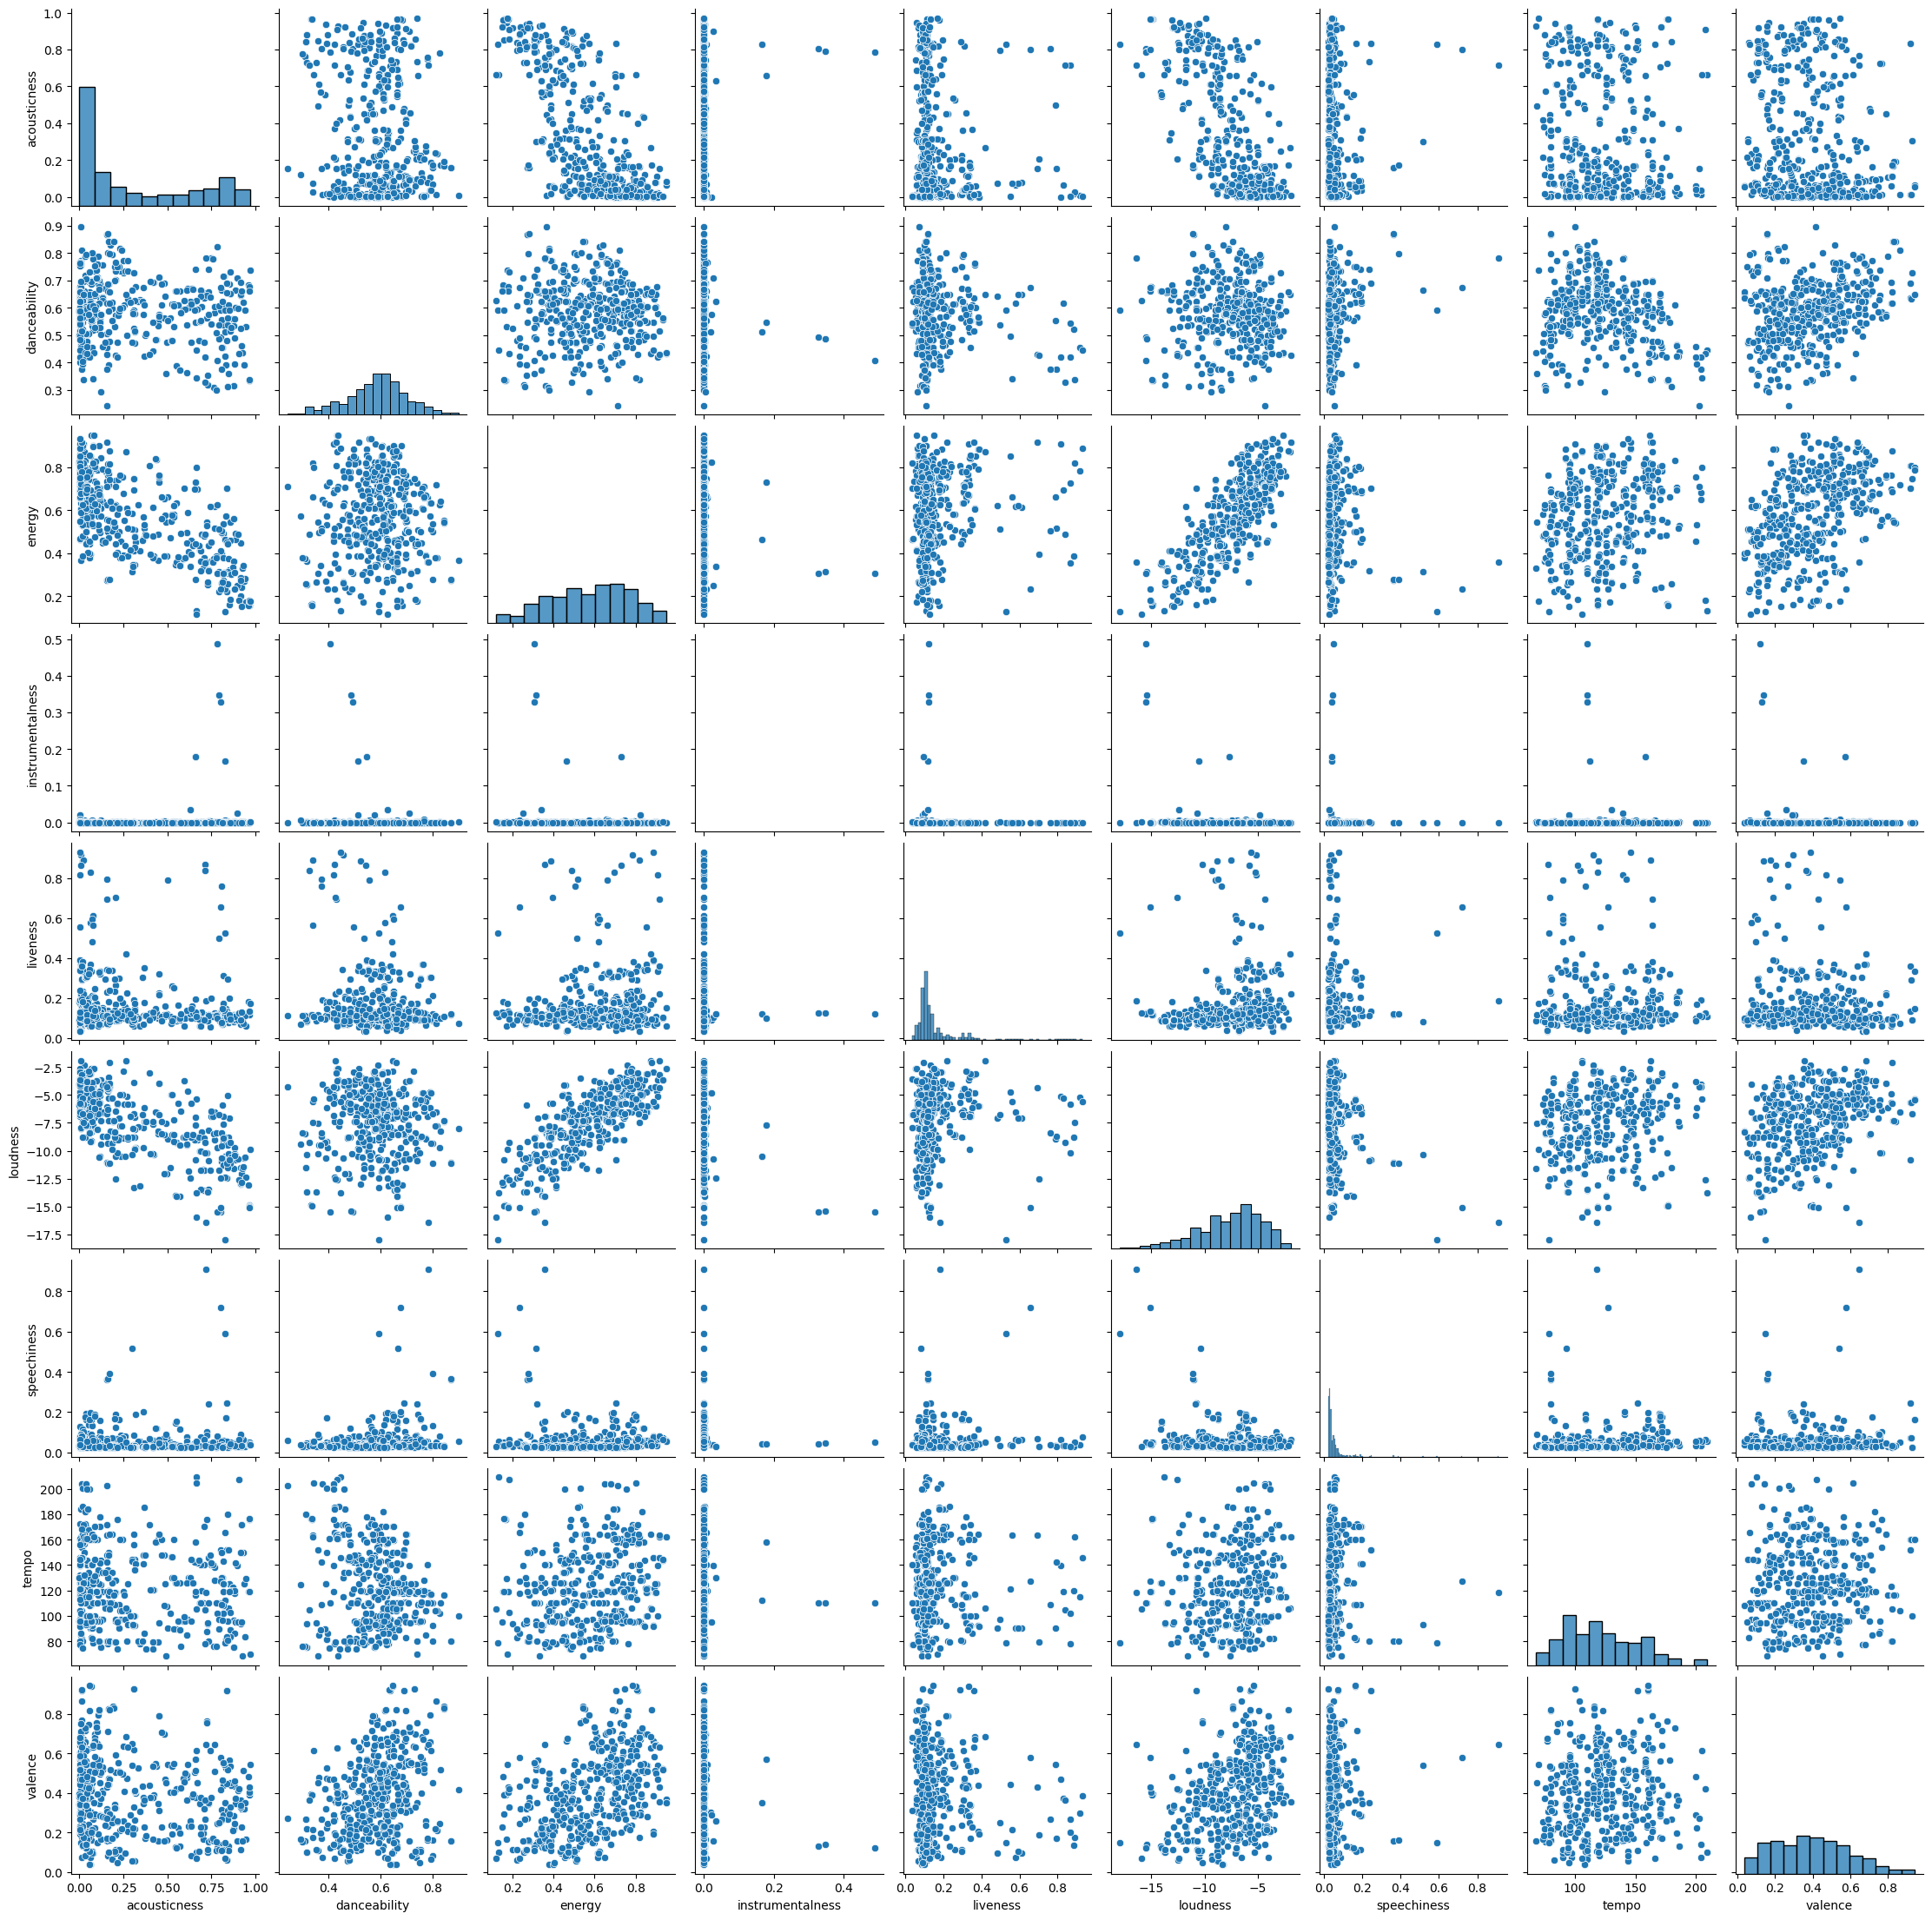

In [31]:
sns.pairplot(features_matrix)

In [32]:
scaled_features_matrix.shape[0]

530

In [33]:
target_array = np.array(target_array)
for i, x in enumerate(np.unique(target_array)):
    print(i,x)
    condition = (target_array == x)
    indices = np.where(condition)
    print(indices)
    print(target_array[indices])

0 1989
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42, 355, 356, 357, 358, 359, 360, 361, 362, 363,
       364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376,
       377, 378, 379, 380, 381, 382, 383, 384, 385, 386], dtype=int64),)
['1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989'
 '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989'
 '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989'
 '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989'
 '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989'
 '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989'
 '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989' '1989'
 '1989' '1989' '1989' '1989' '1989']
1 Fearless
(array([151, 1

In [34]:
# Ref: https://levelup.gitconnected.com/classification-using-gaussian-naive-bayes-from-scratch-6b8ebe830266
# Ref: https://towardsdatascience.com/implementing-naive-bayes-from-scratch-df5572e042ac
# Ref: https://www.geeksforgeeks.org/gaussian-naive-bayes/
# Explains how Gaussian density function calculates the likelihood of a feature x for a specific class (album)
# E.g. to calculate likelihood of feature x[i], e.g. acousticness, given that sample is in a specific album, Y:  P(x[i] | Y)
class GaussianNaiveBayesClassifier:
    # Calculates the likelihood of the sample: the conditional probability of the set of features (row or song) given an album
    # Note: make assumption that the musical features are normally-distributed within each album (hence the Gaussian term in the classifier name)
    def calculateLikelihoodsUsingGaussianDensity(self, x, mean, std):
        # Kept getting division by zero error, so after debugging, added minimum limit for standard deviation to avoid this during inferring likelihood
        minimum_stanard_deviation = 0.1
        std = np.maximum(std, minimum_stanard_deviation)
        # Implement Gaussian density function to calculate the likelihood of the feature
        constant_term = ( 1 /  (std * np.sqrt(2 * np.pi)) )
        probability = np.exp(-0.5 * ( (x - mean) ** 2 / (std ** 2)) )
        return constant_term * probability
    def getClassProbabilityForSong(self, sample_features):
        # Stores every posterior probability (conditional probability that sample belongs to that album given the features) in this list
        posterior_probabilities_of_sample_belonging_to_album = []
        # Iterate over the classes/albums
        for idx, album in enumerate(self.albums):
            # Get the prior probability (proportion of songs for that album in whole dataset)
            # Remember: take the logarithm to avoid numerical underflow and data loss
            prior = np.log(self.priors[idx]) 
            mean = self.means[idx]
            std = self.stds[idx]
            # Calculate new posterior probability for album-label for that sample (using Gaussian formula for likelihood of features)
            # add small nr to logarithm to avoid nan
            likelihoods = np.sum(np.log(self.calculateLikelihoodsUsingGaussianDensity(sample_features, mean, std)))
            # Calculate the posterior probability (album_name|features_in_sample) for that album
            posterior_probability = prior + likelihoods # Remember: laws of logarithms mean summation instead of multiplication
            # Add it to the posteriors list
            posterior_probabilities_of_sample_belonging_to_album.append(posterior_probability)
        # Extract the index of the maximum class posterior probability from the list and return it
        return self.albums[np.argmax(np.array(posterior_probabilities_of_sample_belonging_to_album))]
    def fit(self, X, y):
        # Store number of samples/rows/songs in the train set
        self.nr_samples = X.shape[0]
        # Store number of features (audio attributes) for each row
        self.nr_features = X.shape[1]     
        # Store album labels
        self.albums = np.unique(y)
        # Get the number of unique albums/classes
        self.nr_classes = len(self.albums)
        # Create an empty (zero-filled) matrix which will store the MEAN value of each audio feature for each album/class
        self.means = np.zeros((self.nr_classes, self.nr_features))
        # Do the same for the standard deviations
        self.stds = np.zeros((self.nr_classes, self.nr_features))
        # This array will later store the prior (general probability) for each album, i.e. (nr of times the album appears in dataset)/(total rows)
        self.priors = np.zeros(self.nr_classes)
        # Iterate over the classes, and calculate the mean value of each feature for that class
        for idx, album in enumerate(self.albums):
            album_condition = (y == album) # Returns a Boolean mask of True when a sample belongs to this album and False if it doesn't
            songs_in_album = X[album_condition]
            self.means[idx, :] = np.mean(songs_in_album, axis=0) # axis=0 --> calculate the mean down the columns
            self.stds[idx, :] = np.std(songs_in_album, axis=0)
            self.priors[idx] = songs_in_album.shape[0] / self.nr_samples # sum of songs in that album divided by total nr of samples (prior probability)s
    def predict(self, X):
        labels = []
        for sample in X:
            label = self.getClassProbabilityForSong(sample)
            labels.append(label)
        return labels

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
nb = GaussianNaiveBayesClassifier()
X_train, X_test, y_train, y_test = train_test_split(features_matrix, target_array, test_size=0.33)
nb.fit(np.array(X_train), np.array(y_train))
y_pred = nb.predict(np.array(X_test))
accuracy_score(y_test, y_pred)

0.37142857142857144

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_matrix, target_array, test_size=0.33)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.2742857142857143

The subsequent algorithm that will be applied and evaluated here will be a Decision Tree classifier. As a Decision Tree is a relatively complex algorithm which accepts multiple hyperparameters (in contrast to the two classifiers above, especially Naive-Bayes which does not take any hyperparameters), the pre-made scikit-learn Decision Tree Classifier will be imported here. Although it would be an interesting challenge to implement a Decision Tree classifier from scratch, unfortunately due to the time constraints for the midterm assignment this is infeasible for the current project. Understanding which optimal value to select for splitting the group of samples based on a specific feature is something of a daunting task compared to the implementation of simpler algorithms like K-Nearest Neighbour or the Naive Bayes Classifier.
In order to select the optimal hyperparameters, the scikit-learn Grid Search facility will be used. The advantage of a Decision Tree classifier is that compared to the other classification algorithms here is that it lends itself to visualization of which features were the most important when classifying the samples into album categories.

In [67]:
# Ref: https://plainenglish.io/blog/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda#how-does-it-work 
# Ref: https://vitalflux.com/decision-tree-hyperparameter-tuning-grid-search-example/
from sklearn.model_selection import GridSearchCV # Import the Grid Search facility for evaluating different parameters
from sklearn.tree import DecisionTreeClassifier # Import the Decision Tree Classifier from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features_matrix, target_array, train_size=0.75, random_state=12)

# To use GridSearch, set up a 'parameter dictionary'
# This is a table formatted as a Python dict, where each key represents the name of the hyperparameter to be selected, and
# each value consists of the list or range of parameters to test. The GridSearch algorithm will then output the combination of hyperparameters
# which resulted in the optimal score. The 'scoring' parameter in GridSearchCV can be set to a string which determines which metric to use
# to evaluate the performance of the model.
# We will try to find the best parameters and the score for the following metrics: 
# Average precision, accuracy, recall, F1 - harmonic mean of precision and recall, in order to compare these to the other algorithms used here.

# Decision Tree takes a lot of parameters, therefore this could take a long time to tune!
params_dict = {
    # The chi-squared split-choosing algorithm is currently not supported by the scikit-learn Decision Tree Classifier
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 20), # choose max depth of tree from 1 to 19
    'min_samples_split': range(2,8), # the nr of samples that have to be in a node to continue splitting
    'min_samples_leaf': range(1, 5), # the nr of samples a node has to have to become a leaf, otherwise its parent becomes the leaf
    # nr of features to consider when looking for the best split --> if sqrt, then max_features = sqrt(nr features), if log2, then log2(nr features)
    #'max_features': ['auto', 'sqrt', 'log2'], 
    'random_state':[12], # Set random stat to allow reproducibility of results
    'max_leaf_nodes': range(2,10), # Restrict nr of leaf nodes. Best nodes are defined as relative reduction in impurity. 
    'ccp_alpha': [0.1, 0.25, 0.5, 0.75] # Parameters for Minimal Cost-Complexity Pruning (post-pruning after tree is grown)
}

# Dict storing the scoring metrics to evaluate grid search parameters with
# 'balanced_accuracy' was created to deal with imbalanced datasets, and represents the average recall for each class
# micro param: Calculate metrics globally by counting the total true positives, false negatives and false positives.

scoring_metrics = {'accuracy':0, 'balanced_accuracy':0, 'precision_micro':0, 'recall_micro':0, 'f1_micro':0}
params_for_metrics = {'accuracy':None, 'balanced_accuracy':None, 'precision_micro':None, 'recall_micro':None, 'f1_micro':None}

# Instantiate the Decision Tree Classifier model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree.predict(X_test)

# Iterate over the different ways of scoring to get optimum params and score for each GridSearch
for metric in scoring_metrics.keys():
    grid = GridSearchCV(
        decision_tree, # the model to find the hyperparameters for
        param_grid=params_dict,
        cv=5, # cross-validation with 5 folds
        scoring=metric,
        verbose=1, # controls how much information to display on the timing and folds
    )
    grid.fit(X_train, y_train)
    print(f"Metric: {metric}")
    print(f"Best params: {grid.best_params_}")
    print(f"Best Score for {metric}: {grid.best_score_}")
    scoring_metrics[metric] = grid.best_score_
    params_for_metrics[metric]=grid.best_params_


Fitting 5 folds for each of 29184 candidates, totalling 145920 fits
Metric: accuracy
Best params: {'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 12}
Best Score for accuracy: 0.3199050632911392
Fitting 5 folds for each of 29184 candidates, totalling 145920 fits
Metric: balanced_accuracy
Best params: {'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 12}
Best Score for balanced_accuracy: 0.22005050505050505
Fitting 5 folds for each of 29184 candidates, totalling 145920 fits
Metric: precision_micro
Best params: {'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 12}
Best Score for precision_micro: 0.3199050632911392
Fitting 5 folds for each of 29184 candidates, totalling 145920 fits
Metric: recall_micro
Best params

In [72]:
# Save scores and optimal hyperparameters as csv file and pickle to enable easy loading next time
scoring_metrics_df = pd.DataFrame(list(scoring_metrics.items()), columns=['Metric', 'Score'])
scoring_metrics_df.to_csv('decision_tree_metrics_for_different_hyperparameters.csv', index=False)


In [74]:
scoring_metrics_df.to_pickle('decision_tree_metrics_for_different_hyperparameters_pickle.pkl')

In [77]:
params_for_metrics_df = pd.DataFrame(params_for_metrics)

In [81]:
params_for_metrics_df.head()

,accuracy,balanced_accuracy,precision_micro,recall_micro,f1_micro
ccp_alpha,0.1,0.1,0.1,0.1,0.1
criterion,entropy,entropy,entropy,entropy,entropy
max_depth,3,3,3,3,3
max_leaf_nodes,6,6,6,6,6
min_samples_leaf,1,1,1,1,1


In [78]:
params_for_metrics_df.to_csv('decision_tree_optimal_params_for_metrics.csv', index=False)

In [79]:
params_for_metrics_df.to_pickle('decision_tree_optimal_params_pickle_version.pkl')